<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alanis Caicedo &bull; 11/29/25
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [29]:
# Paquetes necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    Normalizer,
    QuantileTransformer,
    PowerTransformer
)

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [40]:

from google.colab import files

uploaded = files.upload()

import io
df = pd.read_csv('kingCountyHouseData.csv')

# Mostramos las primeras filas
df.head()

Saving kingCountyHouseData.csv to kingCountyHouseData (4).csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Definir características (X) y variable objetivo (y)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
            'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = df[features]
y = df['price']

# --- A. Normalización por el Máximo ---
x_max = X.max()
X_max_normalized = X / x_max
print("--- Normalización por el máximo ---")
display(X_max_normalized.head())

# --- B. Normalización Min-Max ---
min_max_scaler = MinMaxScaler()
# Ajustamos y transformamos, convirtiendo el resultado a DataFrame
X_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
print("\n--- Normalización Min-Max ---")
display(X_min_max_normalized.head())

# --- C. Estandarización (StandardScaler) ---
standard_scaler = StandardScaler()
# Ajustamos y transformamos, convirtiendo el resultado a DataFrame
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
print("\n--- Estandarización (StandardScaler) ---")
display(X_standardized.head())

# Por defecto, guardaremos la versión Estandarizada para usar en el modelo
X_scaled = X_standardized

--- Normalización por el máximo ---


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.087149,0.003421,0.285714,0.0,0.0,0.6,0.538462,0.125399,0.000000,0.970223,0.000000,0.999786,0.994424,1.007765,0.215781,0.006485
1,0.090909,0.28125,0.189808,0.004385,0.571429,0.0,0.0,0.6,0.538462,0.230606,0.082988,0.968238,0.988089,0.999246,0.998815,1.008276,0.272142,0.008768
2,0.060606,0.12500,0.056869,0.006056,0.285714,0.0,0.0,0.6,0.461538,0.081828,0.000000,0.959305,0.000000,0.998259,0.999169,1.007567,0.438003,0.009254
3,0.121212,0.37500,0.144756,0.003028,0.285714,0.0,0.0,1.0,0.538462,0.111583,0.188797,0.975186,0.000000,0.999358,0.994625,1.008886,0.219002,0.005739
4,0.090909,0.25000,0.124077,0.004893,0.285714,0.0,0.0,0.6,0.615385,0.178533,0.000000,0.986104,0.000000,0.998727,0.996634,1.006017,0.289855,0.008612



--- Normalización Min-Max ---


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871



--- Estandarización (StandardScaler) ---


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


**Elección de Técnica de Escalado:**

Se ha seleccionado la **Estandarización (StandardScaler)** como la técnica más adecuada para este conjunto de datos.

**Justificación:**
A diferencia de la normalización Min-Max, que comprime los datos en un rango [0, 1] y es muy sensible a valores atípicos (outliers), la estandarización centra los datos en una media de 0 con una desviación estándar de 1. Esto es crucial en modelos de regresión lineal porque:
1.  Evita que variables con magnitudes grandes (como `sqft_living` o `sqft_lot`) dominen injustamente sobre variables con magnitudes pequeñas (como `bedrooms` o `floors`) simplemente por su escala numérica.
2.  Es más robusta frente a outliers, permitiendo que el modelo aprenda mejor de la distribución general de los datos sin verse sesgado excesivamente por valores extremos de precios o tamaños.

---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [32]:
# 1. Definir las variables finales
# X serán nuestros datos escalados que preparamos en el paso anterior
X = X_scaled

# y será la columna 'price' de nuestro DataFrame original
y = df['price']

# 2. Mostrar las dimensiones (filas, columnas)
print("Dimensiones de X (Características):", X.shape)
print("Dimensiones de y (Etiqueta):", y.shape)

Dimensiones de X (Características): (21613, 18)
Dimensiones de y (Etiqueta): (21613,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [33]:

mi_random_state = 9

# Dividimos los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=mi_random_state)

# Visualizamos las dimensiones de cada conjunto
print(f"Usando random_state = {mi_random_state}")
print("-" * 30)
print("Conjunto de ENTRENAMIENTO (80%):")
print(f"X_train: {X_train.shape} (Casas para estudiar, Características)")
print(f"y_train: {y_train.shape} (Precios para estudiar)")

print("\nConjunto de PRUEBA (20%):")
print(f"X_test:  {X_test.shape} (Casas para el examen, Características)")
print(f"y_test:  {y_test.shape} (Precios para el examen)")

Usando random_state = 9
------------------------------
Conjunto de ENTRENAMIENTO (80%):
X_train: (17290, 18) (Casas para estudiar, Características)
y_train: (17290,) (Precios para estudiar)

Conjunto de PRUEBA (20%):
X_test:  (4323, 18) (Casas para el examen, Características)
y_test:  (4323,) (Precios para el examen)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

--- Estadísticas de los Precios (Entrenamiento) ---
count    1.729000e+04
mean     5.393198e+05
std      3.653520e+05
min      7.500000e+04
25%      3.224250e+05
50%      4.500000e+05
75%      6.403750e+05
max      7.700000e+06
Name: price, dtype: float64

--- Estadísticas de los Precios (Prueba) ---
count    4.323000e+03
mean     5.431611e+05
std      3.741701e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.499500e+05
75%      6.525500e+05
max      5.570000e+06
Name: price, dtype: float64


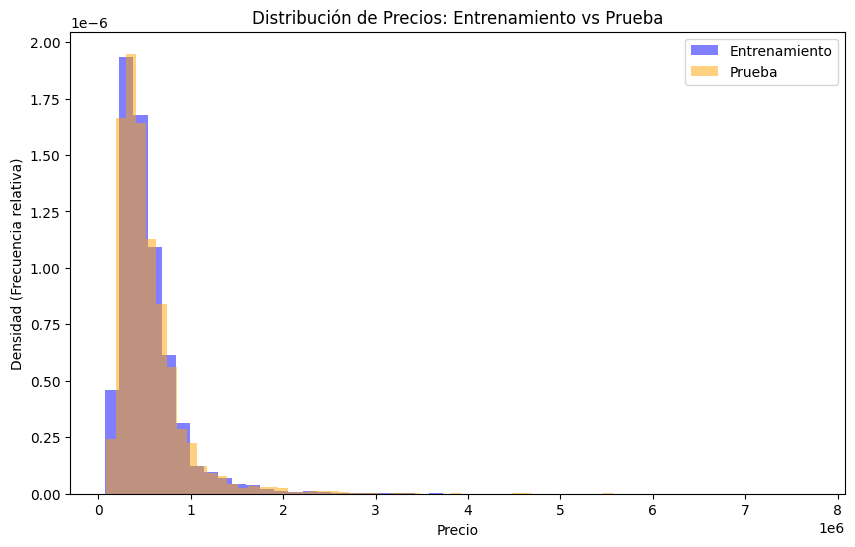

In [34]:
# 1. Comparación Estadística
print("--- Estadísticas de los Precios (Entrenamiento) ---")
print(y_train.describe())
print("\n--- Estadísticas de los Precios (Prueba) ---")
print(y_test.describe())

# 2. Comparación Visual (Histogramas)
plt.figure(figsize=(10, 6))

# Histograma de Entrenamiento (Azul)
plt.hist(y_train, bins=50, alpha=0.5, label='Entrenamiento', density=True, color='blue')

# Histograma de Prueba (Naranja)
plt.hist(y_test, bins=50, alpha=0.5, label='Prueba', density=True, color='orange')

plt.title('Distribución de Precios: Entrenamiento vs Prueba')
plt.xlabel('Precio')
plt.ylabel('Densidad (Frecuencia relativa)')
plt.legend()
plt.show()

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

In [35]:


# 1. Definir el modelo (Crear la instancia)
modelo = LinearRegression()

# 2. Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# 3. Verificar los parámetros aprendidos
print("¡Entrenamiento completado!")
print(f"Intercepto (b0): {modelo.intercept_:.2f}")
print("Coeficientes (pesos de cada variable):")
print(modelo.coef_)

¡Entrenamiento completado!
Intercepto (b0): 539621.51
Coeficientes (pesos de cada variable):
[-30915.09644199  32849.51386561  78865.57570105   6080.32876548
   3965.18669861  50237.24650316  41199.25944436  17577.01863691
 111248.47791468  74345.80534259  24556.91897302 -78420.26031485
   8561.98901026 -31461.9105907   83489.48564116 -30808.39916065
  18207.69976815 -11175.21661111]


---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [36]:
# 1. Realizar predicciones usando los datos de prueba
y_pred = modelo.predict(X_test)

# 2. Crear una tabla (DataFrame) para comparar visualmente
df_resultados = pd.DataFrame({
    'Precio Real': y_test.values,
    'Predicción Modelo': y_pred,
    'Diferencia': y_test.values - y_pred
})

# 3. Mostrar las primeras 10 filas de la comparación
print("Tabla comparativa: Realidad vs. Predicción")
display(df_resultados.head(10))

Tabla comparativa: Realidad vs. Predicción


,Precio Real,Predicción Modelo,Diferencia
0,262000.0,186171.278229,75828.721771
1,593777.0,446928.448924,146848.551076
2,405000.0,400401.975371,4598.024629
3,366000.0,439006.535493,-73006.535493
4,361000.0,271408.917333,89591.082667
5,582000.0,677502.939973,-95502.939973
6,970500.0,771941.405180,198558.594820
7,353500.0,617590.172480,-264090.172480
8,438924.0,382542.558383,56381.441617
9,349900.0,132425.216951,217474.783049


Calcula el error cuadrático medio.

In [37]:

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:,.2f}")

Error Cuadrático Medio (MSE): 39,752,170,223.81


Escribe el error cuadrático medio para cada tipo de escalado:

- Escalado MaxAbsScaler:
- Escalado MinMaxScaler:
- Escalado RobustScaler:
- Escalado StandardScaler:
- Escalado Normalizer:
- Escalado QuantileTransformer:
- Escalado PowerTransformer:

In [38]:
# 1. Definir los datos (por seguridad)
X_orig = df[features]
y = df['price']

# 2. Lista de escaladores a probar
escaladores = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=9),
    'PowerTransformer': make_pipeline(MinMaxScaler(), PowerTransformer())
}

print("--- RESULTADOS FINALES  ---")

# 3. Calcular y mostrar cada uno
for nombre, scaler in escaladores.items():
    # A. Escalar
    X_scaled = scaler.fit_transform(X_orig)

    # B. Dividir
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=9)

    # C. Entrenar y Predecir
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # D. Calcular Error
    mse = mean_squared_error(y_test, y_pred)

    print(f"Escalado {nombre}: {mse:,.2f}")

--- RESULTADOS FINALES  ---
Escalado MaxAbsScaler: 39,752,170,223.81
Escalado MinMaxScaler: 39,752,170,223.81
Escalado RobustScaler: 39,752,170,223.81
Escalado StandardScaler: 39,752,170,223.81
Escalado Normalizer: 39,931,358,962.46
Escalado QuantileTransformer: 53,361,086,482.39
Escalado PowerTransformer: 53,296,219,519.73


Escribe un párrafo sobre qué hace cada escalado no visto en clase:

- **Escalado ...:** ...

- **Escalado MaxAbsScaler:** Escala cada característica individualmente dividiéndola por su valor máximo absoluto. Esto transforma los datos al rango [-1, 1]. Es útil porque no centra los datos (no rompe la "dispersión" o *sparsity*), por lo que es ideal para datos que ya tienen muchos ceros.

- **Escalado RobustScaler:** Funciona de manera similar al estándar, pero es "robusto" (resistente) a los valores atípicos (*outliers*). En lugar de usar la media y la desviación estándar, utiliza la mediana y el rango intercuartílico (IQR), logrando que unos pocos datos extremos no distorsionen la escala del resto.

- **Escalado Normalizer:** A diferencia de los otros métodos que escalan por columnas (características), este escala por filas (muestras). Ajusta cada casa individualmente para que tenga una norma unitaria (longitud de 1). Es común en clasificación de texto y agrupamiento, pero suele ser menos efectivo para regresión de precios.

- **Escalado QuantileTransformer:** Aplica una transformación no lineal que mapea la distribución de probabilidad de cada característica a una distribución uniforme o normal. Su objetivo es suavizar distribuciones inusuales y reducir el impacto de los valores atípicos, aunque puede distorsionar las correlaciones lineales entre las variables.

- **Escalado PowerTransformer:** Aplica una transformación de potencia (como Yeo-Johnson o Box-Cox) para hacer que los datos se asemejen lo más posible a una distribución normal (campana de Gauss). Es muy útil para estabilizar la varianza y minimizar el sesgo en datos que no siguen una distribución normal.